## Red Wine Quality Prediction
Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.



In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score,classification_report,plot_roc_curve

from scipy.stats import zscore
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE



In [69]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [70]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


we want to predict whether the wine quality is good or bad, so it is a classification problem

In [71]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


1599 rows and 12 columns

In [72]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No null values in any feature and all columns have float values except the target column.

In [74]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [75]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### checking for outliers

In [76]:
zScores=np.abs(zscore(df))
zScores

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [77]:
filteredEntries=(zScores<3).all(axis=1)
filteredEntries

array([ True,  True,  True, ...,  True,  True,  True])

In [78]:
np.sum(filteredEntries)

1451

In [79]:
(1599 -1451)/1599

0.09255784865540963

almost 9% of data are outliers So not removing them.

encoding the quality feature as qualityLabel having 1 for quality values >=7
and 0 for quality values <7

In [80]:
def transform01(x):
    if x>=7:
        return 1
    else: 
        return 0

In [81]:
df['qualityLabel']=df['quality'].apply(transform01)


In [82]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [83]:
df['qualityLabel']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: qualityLabel, Length: 1599, dtype: int64

In [84]:
sum(df['quality']<7)

1382

In [85]:
sum(df['quality']>=7)

217

In [86]:
sum(df['qualityLabel']==0)

1382

In [87]:
sum(df['qualityLabel']==1)

217

In [88]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityLabel
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


### EDA

<AxesSubplot:xlabel='qualityLabel', ylabel='count'>

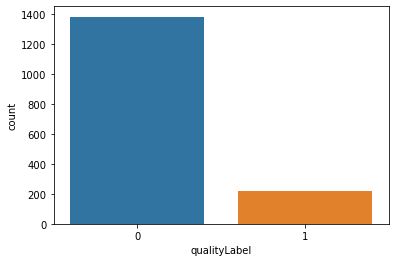

In [89]:
sns.countplot(x='qualityLabel',data=df)

bad wines are more than good wines there is class imbalance issue

In [92]:
df.columns[:-2]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

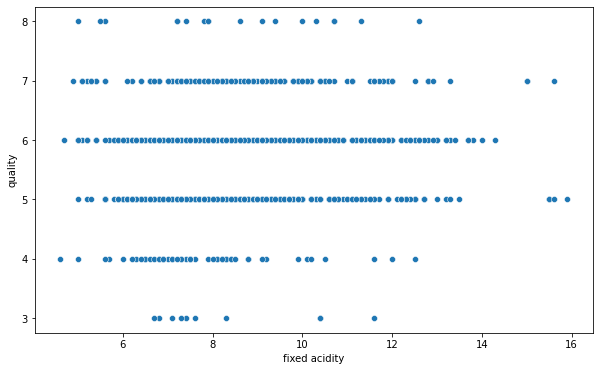

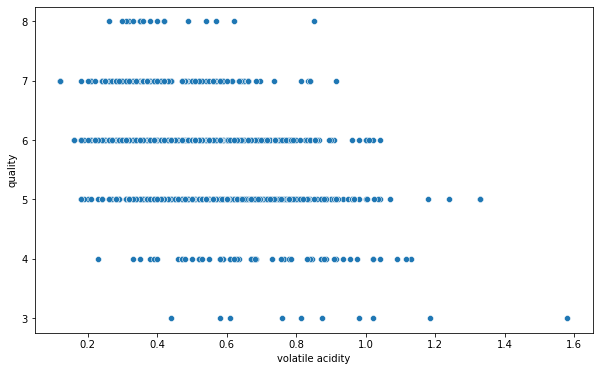

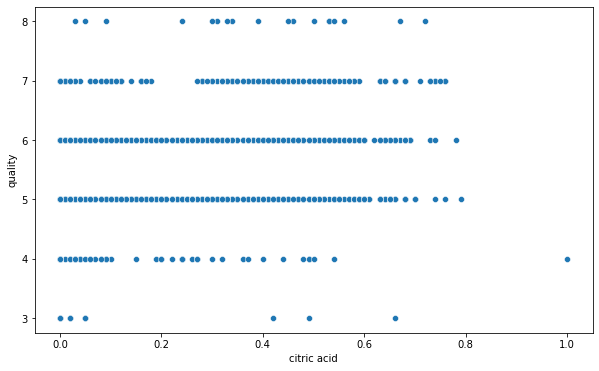

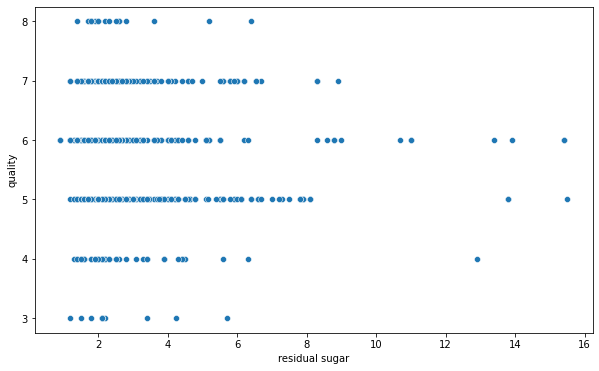

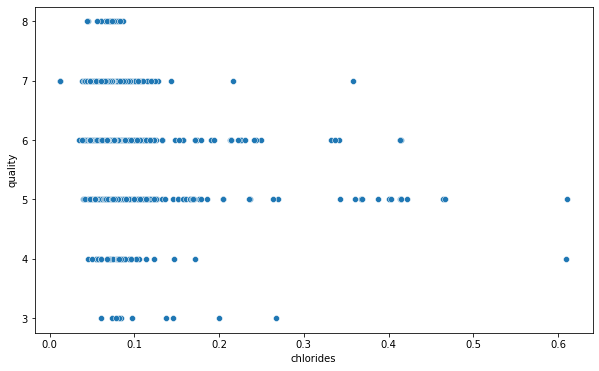

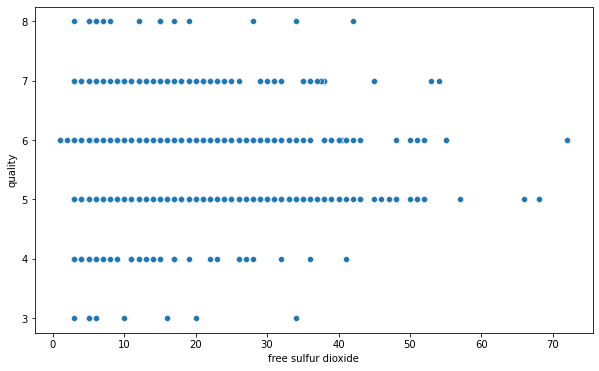

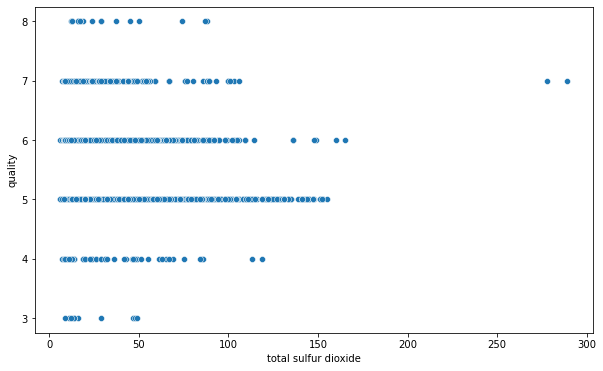

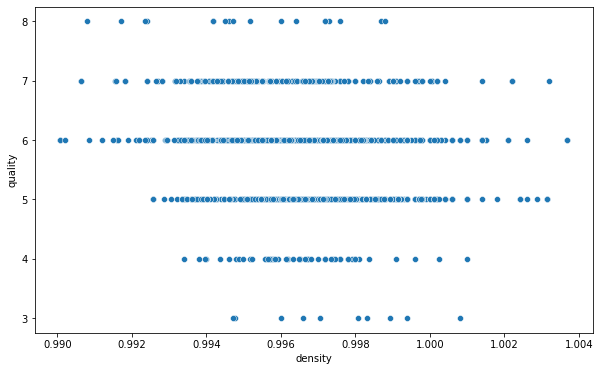

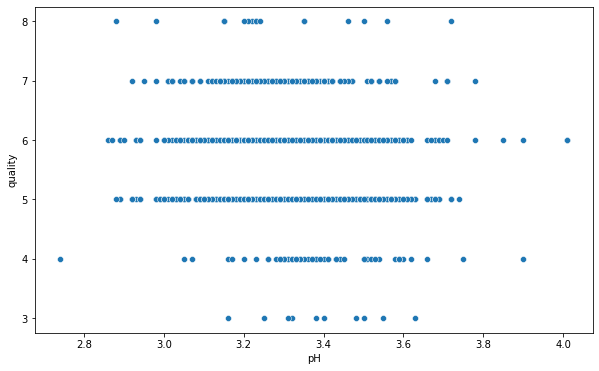

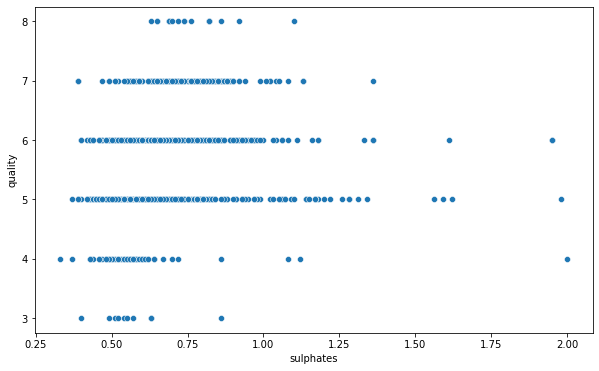

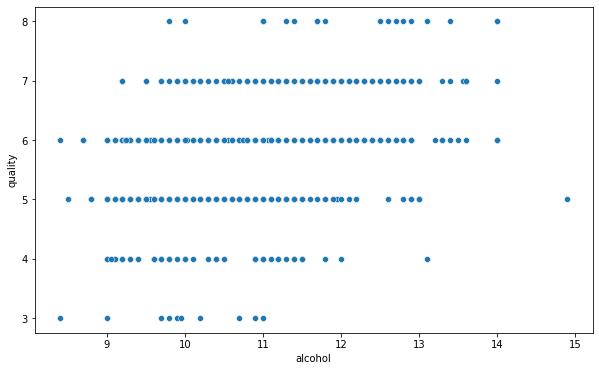

In [95]:
for column in df.columns[:-2]:
    fig = plt.figure(figsize = (10,6))
    sns.scatterplot(x=df[column],y=df['quality'])

for most of the features there is no specific pattern for the quality increase

In [96]:
df.drop('quality',axis=1,inplace=True)

In [97]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityLabel
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [98]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'qualityLabel'],
      dtype='object')

In [99]:
columns=df.columns[:-1]

In [100]:
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

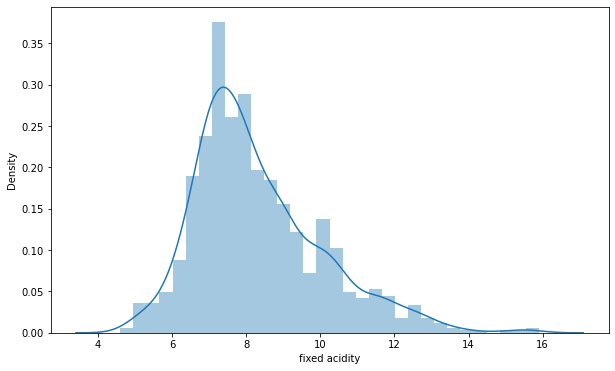

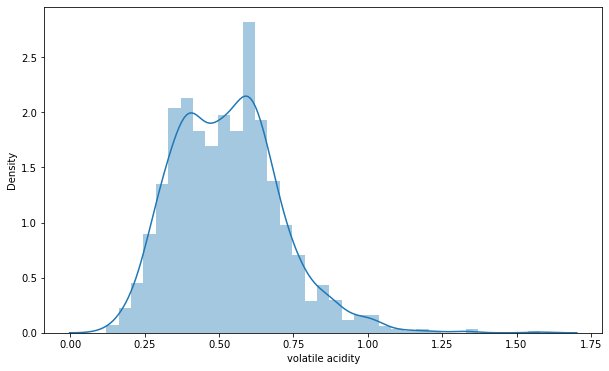

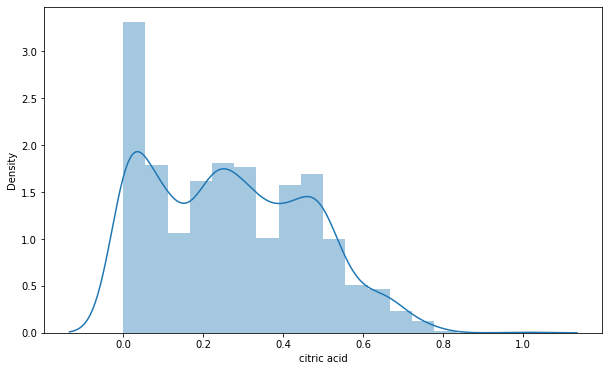

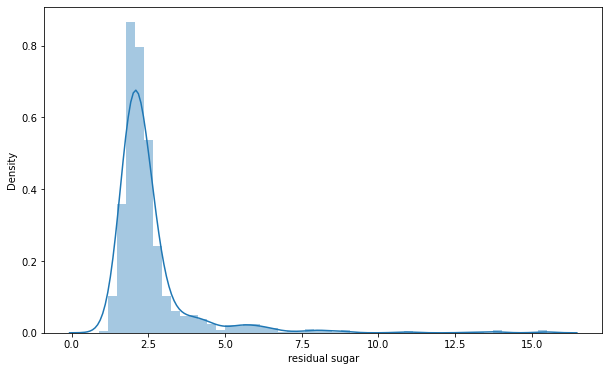

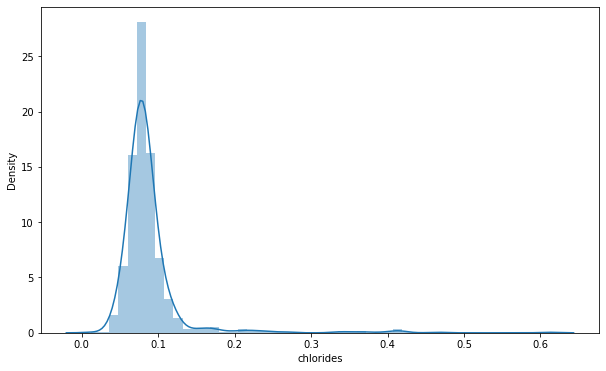

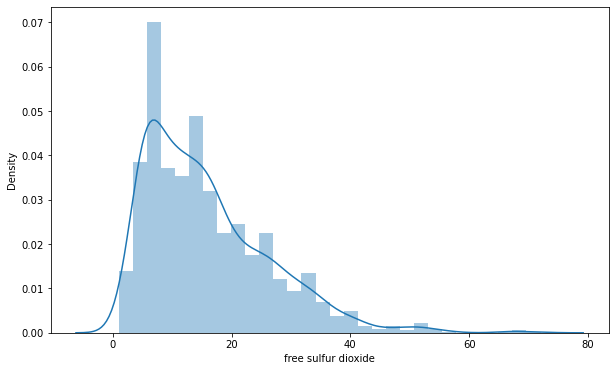

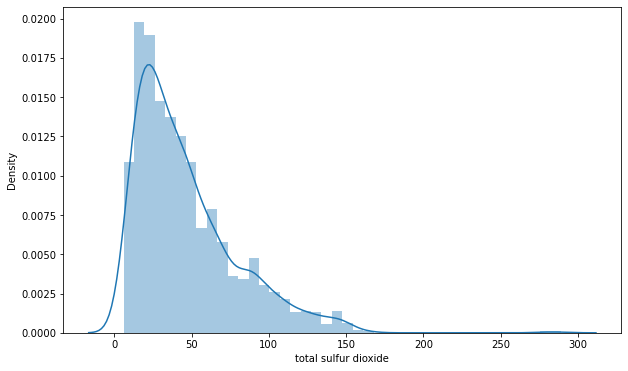

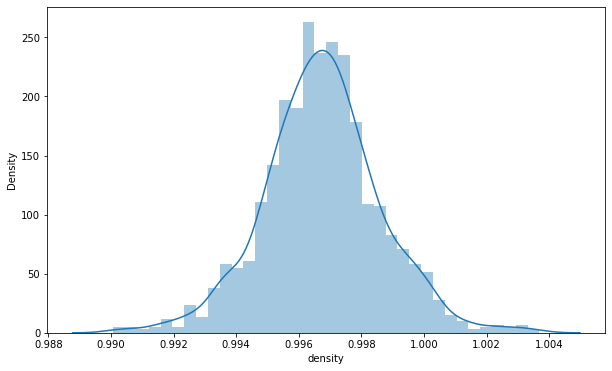

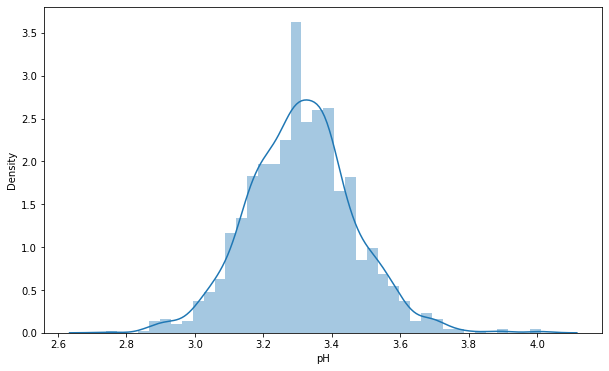

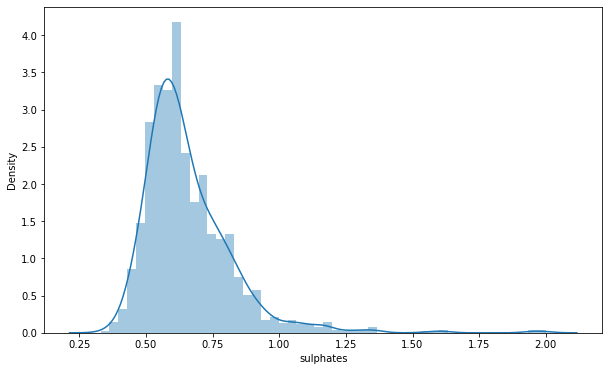

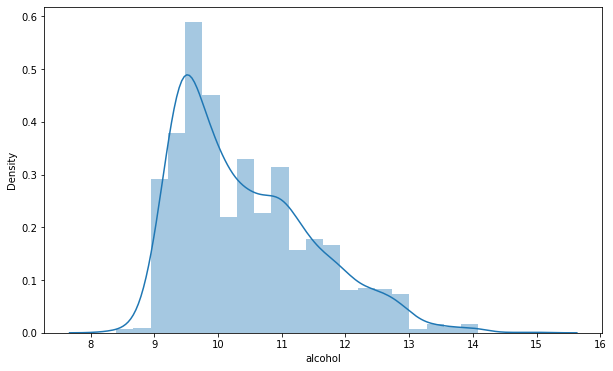

In [101]:
for x in columns:
    fig = plt.figure(figsize = (10,6))
    sns.distplot(df[x])

Most Of the features here are right skewed

## checking the skewness values

In [102]:
for column in df.columns[:-1]:
    print(column , df[column].skew())

fixed acidity 0.9827514413284587
volatile acidity 0.6715925723840199
citric acid 0.3183372952546368
residual sugar 4.54065542590319
chlorides 5.680346571971722
free sulfur dioxide 1.250567293314441
total sulfur dioxide 1.515531257594554
density 0.07128766294927483
pH 0.19368349811284427
sulphates 2.4286723536602945
alcohol 0.8608288068888538


'citric acid', density, pH have skewness less than 0.5
others have more than 0.5, so trying to minimize the skewness

In [103]:
moreSkewColumns=['fixed acidity', 'volatile acidity','residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide','pH', 'sulphates', 'alcohol']

In [104]:
def min_skewness(colu):
    min_Skew=np.abs(df[colu].skew())
    print("initial",min_Skew)
    
    box_col_Skew=10
    min_SkewType=""
    log_col=np.log(df[colu])
    sqrt_col=np.sqrt(df[colu])
    try:
        box_col=stats.boxcox(df[colu])[0]
        box_col_Skew=np.abs(pd.Series(box_col).skew())
        print(box_col_Skew)

    except ValueError:
        print("hi")
    
    log_col_Skew=np.abs(log_col.skew())
    sqrt_col_Skew=np.abs(sqrt_col.skew())
    
    print(log_col_Skew)
    print(sqrt_col_Skew)
    
    if log_col_Skew<min_Skew:
        min_SkewType="log"
        min_Skew=log_col_Skew
    if sqrt_col_Skew<min_Skew:
        min_SkewType="sqrt"
        min_Skew=sqrt_col_Skew
    if box_col_Skew<min_Skew:
        min_SkewType="box"
        min_Skew=box_col_Skew
    print(min_Skew)
    print(column,"=",min_SkewType)

In [105]:
for column in moreSkewColumns:
    print(column)
    min_skewness(column)
    print("="*20)

fixed acidity
initial 0.9827514413284587
0.000517419520218384
0.3939149942929756
0.6850059528714455
0.000517419520218384
fixed acidity = box
volatile acidity
initial 0.6715925723840199
0.0005956521843009344
0.4343845902251234
0.10835527504529936
0.0005956521843009344
volatile acidity = box
residual sugar
initial 4.54065542590319
0.09593003893246714
1.8068638195807207
2.9567627473692695
0.09593003893246714
residual sugar = box
chlorides
initial 5.680346571971722
0.4996431388592009
1.7452154426856812
3.708789126321946
0.4996431388592009
chlorides = box
free sulfur dioxide
initial 1.250567293314441
0.019777750883785125
0.23403124715031437
0.4833443103291927
0.019777750883785125
free sulfur dioxide = box
total sulfur dioxide
initial 1.515531257594554
0.008028145489947599
0.07932282524494874
0.6404385660380522
0.008028145489947599
total sulfur dioxide = box
pH
initial 0.19368349811284427
0.00030024019702269716
0.005120701341526834
0.0987863268357186
0.00030024019702269716
pH = box
sulphates

### boxCox transformation is giving less skewness for all features
### Applying boxCox to remove skewness for all features having more than 0.5 skewness

In [107]:
for column in moreSkewColumns:
    df[column]= stats.boxcox(df[column])[0]


In [108]:
for column in df.columns[:-1]:
    print(column , df[column].skew())

fixed acidity 0.000517419520218384
volatile acidity 0.0005956521843009344
citric acid 0.3183372952546368
residual sugar -0.09593003893246714
chlorides -0.4996431388592009
free sulfur dioxide -0.019777750883785125
total sulfur dioxide -0.008028145489947599
density 0.07128766294927483
pH -0.00030024019702269716
sulphates -0.024779310382209464
alcohol 0.10936702240086463


now for all the features skewness lies between -0.5 and 0.5

In [110]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityLabel
0,1.103306,-0.332419,0.00,0.450049,-4.920401,2.867882,3.861490,0.99780,1.232956,-0.801405,0.300482,0
1,1.116875,-0.124623,0.00,0.572939,-4.140121,4.102521,4.686835,0.99680,1.143688,-0.476630,0.300504,0
2,1.116875,-0.259922,0.04,0.530233,-4.325636,3.317116,4.421290,0.99700,1.161641,-0.546246,0.300504,0
3,1.198255,-0.997735,0.56,0.450049,-4.963593,3.504207,4.550629,0.99800,1.131525,-0.737642,0.300504,0
4,1.103306,-0.332419,0.00,0.450049,-4.920401,2.867882,3.861490,0.99780,1.232956,-0.801405,0.300482,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.054038,-0.462056,0.08,0.473382,-4.391441,4.503448,4.171856,0.99490,1.216328,-0.737642,0.300535,0
1595,1.039149,-0.531779,0.10,0.513157,-5.614127,4.835265,4.351412,0.99512,1.235698,-0.318618,0.300559,0
1596,1.058737,-0.590351,0.13,0.530233,-4.920401,4.341848,4.056652,0.99574,1.207903,-0.336470,0.300553,0
1597,1.039149,-0.402230,0.12,0.473382,-4.963593,4.503448,4.171856,0.99547,1.249293,-0.413072,0.300523,0


In [112]:
df.corr()['qualityLabel']

fixed acidity           0.103347
volatile acidity       -0.288570
citric acid             0.214716
residual sugar          0.061635
chlorides              -0.168347
free sulfur dioxide    -0.084771
total sulfur dioxide   -0.168213
density                -0.150460
pH                     -0.057595
sulphates               0.249356
alcohol                 0.388863
qualityLabel            1.000000
Name: qualityLabel, dtype: float64

<AxesSubplot:>

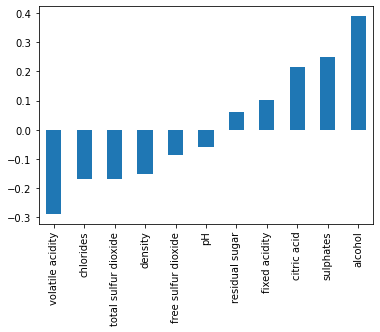

In [113]:
df.corr()['qualityLabel'][:-1].sort_values().plot(kind='bar')

In [115]:
df.corr()['qualityLabel'][:-1].sort_values()

volatile acidity       -0.288570
chlorides              -0.168347
total sulfur dioxide   -0.168213
density                -0.150460
free sulfur dioxide    -0.084771
pH                     -0.057595
residual sugar          0.061635
fixed acidity           0.103347
citric acid             0.214716
sulphates               0.249356
alcohol                 0.388863
Name: qualityLabel, dtype: float64

volatile acidity, chlorides, total sulphur dioxide, density are negatively corelated

 fixed acidity, citric acid, sulphates, alcohol are positively corelated

free suphur dioxide,ph , residual Sugar, have almost no corelation to qualitylabel

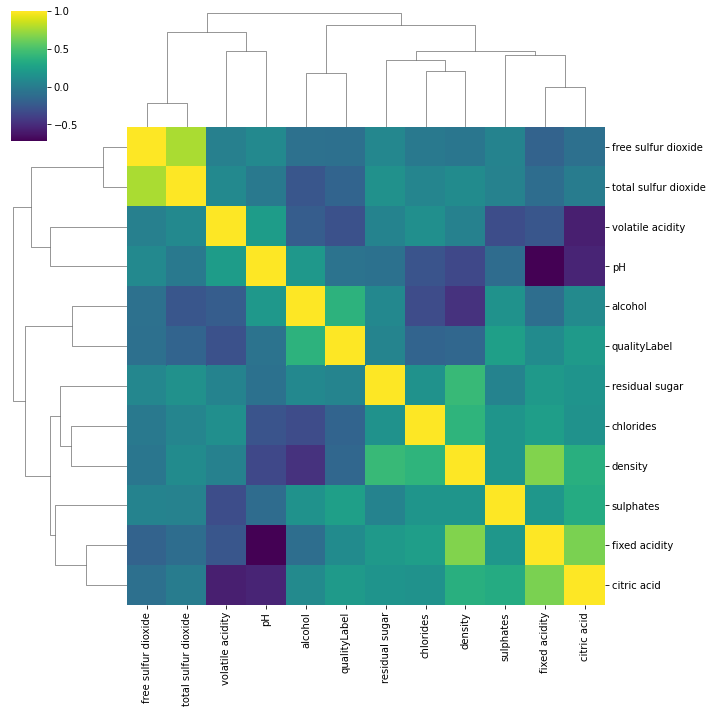

In [114]:
sns.clustermap(df.corr(),cmap='viridis')

As the classes are not balanced, doing upscaling to balance the classes

<AxesSubplot:xlabel='qualityLabel', ylabel='count'>

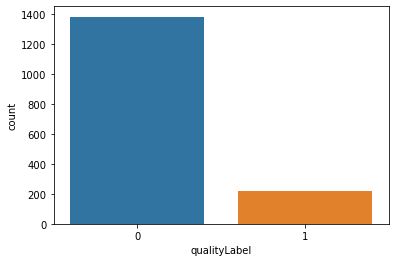

In [117]:
sns.countplot(df['qualityLabel'])

splitting into X and y features

In [122]:
dfx=df.drop('qualityLabel',axis=1)
dfy=df['qualityLabel']

### applying smote

In [123]:
smt=SMOTE()
X,y=smt.fit_resample(dfx,dfy)

In [125]:
y.value_counts()

0    1382
1    1382
Name: qualityLabel, dtype: int64

Now both the classes are balanced

# Applying different machine learning models now

## identifying the best random state

In [134]:
max_accu=0
maxRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    pred=dt.predict(X_test)
    accurac=accuracy_score(y_test,pred)
    #print(accurac*100,"at random state",i)
    if(accurac>max_accu):
        max_accu=accurac
        maxRS=i
        
print("best accuracy is",max_accu,"on random state",maxRS)

best accuracy is 0.9079956188389924 on random state 138


best accuracy is 0.9079956188389924 on random state 138

In [130]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=138)

**TASK: Scale the X train and X test data.**

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [138]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [175]:
DTC=DecisionTreeClassifier()
DTC.fit(scaled_X_train,y_train)
pred=DTC.predict(scaled_X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.92      0.88      0.90       456
           1       0.89      0.93      0.91       457

    accuracy                           0.91       913
   macro avg       0.91      0.91      0.91       913
weighted avg       0.91      0.91      0.91       913



In [176]:
RFC=RandomForestClassifier()
RFC.fit(scaled_X_train,y_train)
pred=RFC.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       456
           1       0.91      0.97      0.94       457

    accuracy                           0.94       913
   macro avg       0.94      0.94      0.94       913
weighted avg       0.94      0.94      0.94       913



In [177]:
svc=SVC()
svc.fit(scaled_X_train,y_train)
pred=svc.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       456
           1       0.86      0.94      0.89       457

    accuracy                           0.89       913
   macro avg       0.89      0.89      0.89       913
weighted avg       0.89      0.89      0.89       913



In [178]:
ada=AdaBoostClassifier()
ada.fit(scaled_X_train,y_train)
pred=ada.predict(scaled_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       456
           1       0.84      0.89      0.87       457

    accuracy                           0.86       913
   macro avg       0.86      0.86      0.86       913
weighted avg       0.86      0.86      0.86       913



In [179]:
dtcAC=0.91
rfcAC=0.94
svcAC=0.89
adaAC=0.86

### now checking cross val score

In [180]:
DTCcv=cross_val_score(DTC,X,y,cv=5).mean()
DTCcv

0.8701188510627145

In [181]:
RFCcv=cross_val_score(RFC,X,y,cv=5).mean()
RFCcv

0.9073839662447257

In [182]:
svcCV=cross_val_score(svc,X,y,cv=5).mean()
svcCV

0.7879936839898316

In [183]:
adaCV=cross_val_score(ada,X,y,cv=5).mean()
adaCV

0.8350237177975208

In [184]:
print(dtcAC-DTCcv)
print(rfcAC-RFCcv)
print(svcAC-svcCV)
print(adaAC-adaCV)

0.03988114893728556
0.03261603375527422
0.10200631601016841
0.02497628220247916


AdaBoost classifier has the less difference between the accuracy scores, so it is the best model

## HyperParameterTuning

In [140]:
from sklearn.model_selection import GridSearchCV

In [187]:
ada

AdaBoostClassifier()

In [191]:
param_grid = {'n_estimators':list(range(1,12)),'learning_rate':[0.001,0.01,0.1,1],'algorithm':['SAMME','SAMME.R']}
grid = GridSearchCV(ada,param_grid)

In [192]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]})

In [193]:
grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 10}

### Displaying the confusion matrix and classification report for your model.

In [194]:
from sklearn.metrics import confusion_matrix,classification_report

In [195]:
grid_pred = grid.predict(scaled_X_test)

In [196]:
confusion_matrix(y_test,grid_pred)

array([[358,  98],
       [ 57, 400]], dtype=int64)

In [197]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       456
           1       0.80      0.88      0.84       457

    accuracy                           0.83       913
   macro avg       0.83      0.83      0.83       913
weighted avg       0.83      0.83      0.83       913



## Training with best params

In [198]:
Final_model=AdaBoostClassifier(algorithm='SAMME',learning_rate=1,n_estimators=10)
Final_model.fit(X_train,y_train)
pred=Final_model.predict(X_test)
accuracyScore=accuracy_score(y_test,pred)
print(accuracyScore)

0.828039430449069


final accuracy achieved is 82.8% with ada boost classifier

## plotting AUC ROC CURVE

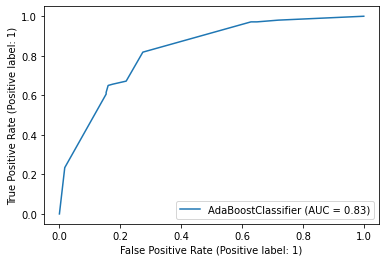

In [200]:
plot_roc_curve(Final_model,scaled_X_test,y_test)

In [201]:
Final_model.feature_importances_

array([0.        , 0.123931  , 0.        , 0.        , 0.        ,
       0.07128769, 0.        , 0.        , 0.        , 0.20578328,
       0.59899802])

In [202]:
importances=Final_model.feature_importances_

In [205]:
feats = pd.DataFrame(data=importances,index=X.columns,columns=['Importance'])

In [206]:
feats

,Importance
fixed acidity,0.000000
volatile acidity,0.123931
citric acid,0.000000
residual sugar,0.000000
chlorides,0.000000
free sulfur dioxide,0.071288
total sulfur dioxide,0.000000
density,0.000000
pH,0.000000
sulphates,0.205783


Only 4 features(volatile acidity, free sulphur dioxide, sulphates, alcohol) are important in predicting the wine quality(good / bad)


## saving the model


In [208]:
import joblib
joblib.dump(Final_model,"Final_model.pkl")

['Final_model.pkl']